# FE (Gram) algorithm

In [196]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy

### Step 1: Obtain orthonormal bases of Gram polynomials on the boundaries

### Euclidean Vectors

In [197]:
basis = [np.array([3, 1, 3]), np.array([2, 2, 2]), np.array([1, 8, 6])]

#Write basis vector as columns of matrix V
m = 3
V = np.zeros((m, m))
V[:, 0] = basis[0]
V[:, 1] = basis[1]
V[:, 2] = basis[2]

def sp(u, v):
    return np.sum(u * v)

def proj(u, v):
    a1 = sp(v, u) 
    a2 = sp(u, u)
    return a1/a2 * u 

def norm(u):
    return np.sqrt(sp(u, u))

#### Classical Gram-Schmidt orthogonalisation

In [198]:
def classicalGramSchmidt(V): 
    n, k = V.shape
    U = np.zeros(V.shape) 
    U[:, 0] = V[:, 0] / norm(V[:, 0]) 
    print(U)

    for i in range(1, k): 
        U[:, i] = V[:, i]
        for j in range(i): 
            U[:, i] = U[:, i] - proj(U[:, j], U[:, i])
        U[:, i] = U[:, i] / norm(U[:, i])
    return U

U = classicalGramSchmidt(V)
u1 = U[:, 0]
u2 = U[:, 1]
u3 = U[:, 2]
u1, u2, u3, sp(u1, u2), sp(u1, u1), sp(u2, u2), sp(u1, u3)

[[0.6882472  0.         0.        ]
 [0.22941573 0.         0.        ]
 [0.6882472  0.         0.        ]]


(array([0.6882472 , 0.22941573, 0.6882472 ]),
 array([-0.16222142,  0.97332853, -0.16222142]),
 array([-0.70710678,  0.        ,  0.70710678]),
 -1.942890293094024e-16,
 0.9999999999999996,
 1.0,
 3.3306690738754696e-16)

#### Modified Gram-Schmidt orthogonalisation

In [199]:
def modifiedGramSchmidt(V): 
    n, k = V.shape
    U    = np.copy(V) 
    U[:, 0] = V[:, 0] / norm(V[:, 0]) 

    for i in range(1, k): 
        for j in range(i, k): 
            U[:, j] = U[:, j] - proj(U[:, i - 1], U[:, j])

        U[:, i] = U[:, i] / norm(U[:, i])
    return U

U = modifiedGramSchmidt(V)
u1 = U[:, 0]
u2 = U[:, 1]
u3 = U[:, 2]
u1, u2, u3, sp(u1, u2), sp(u1, u1), sp(u2, u2), sp(u1, u3)

(array([0.6882472 , 0.22941573, 0.6882472 ]),
 array([-0.16222142,  0.97332853, -0.16222142]),
 array([-0.70710678,  0.        ,  0.70710678]),
 -1.942890293094024e-16,
 0.9999999999999996,
 1.0,
 3.3306690738754696e-16)

In [201]:
def qrGramSchmidt(V):
    q, r = scipy.linalg.qr(V) 
    return q 


U = qrGramSchmidt(V)
u1 = U[:, 0]
u2 = U[:, 1]
u3 = U[:, 2]
u1, u2, u3, sp(u1, u2), sp(u1, u1), sp(u2, u2), sp(u1, u3)

(array([-0.6882472 , -0.22941573, -0.6882472 ]),
 array([ 0.16222142, -0.97332853,  0.16222142]),
 array([-7.07106781e-01, -5.27355937e-16,  7.07106781e-01]),
 1.3877787807814457e-17,
 0.9999999999999996,
 1.0000000000000009,
 -1.1102230246251565e-16)

### Polynomial bases

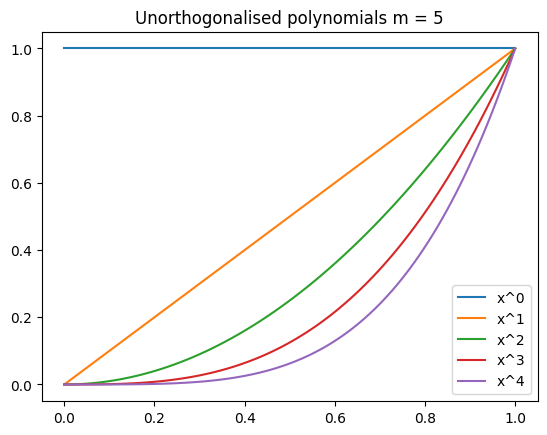

i = 0 u_ij = [ 1.00000000e+00  1.14491749e-16 -1.83880688e-16  4.40619763e-16
  8.25381430e-15]
i = 1 u_ij = [1.14491749e-16 1.00000000e+00 2.49800181e-16 5.55111512e-17
 1.24553146e-14]
i = 2 u_ij = [-1.83880688e-16  2.49800181e-16  1.00000000e+00 -3.67761377e-16
  7.52869989e-15]
i = 3 u_ij = [ 4.40619763e-16  5.55111512e-17 -3.67761377e-16  1.00000000e+00
  1.30451205e-15]
i = 4 u_ij = [8.25381430e-15 1.24553146e-14 7.52869989e-15 1.30451205e-15
 1.00000000e+00]


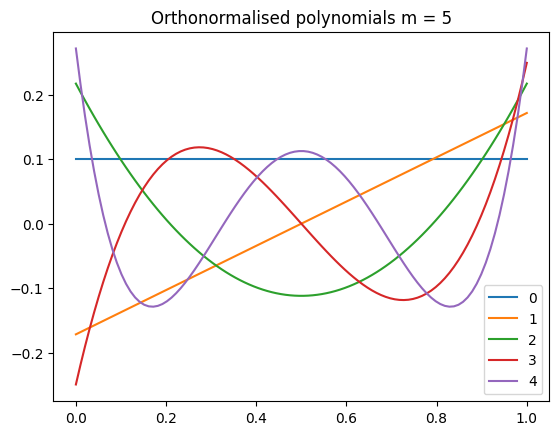

In [214]:
x = np.linspace(0, 1, 100) 

#Linear map for polynomial scalar product
A = np.zeros((m, len(x)))
for i in range(m): 
    #Polynomial basis {1, x, x^2, x^3, x^4, ..., x^m}
    A[i] = x**i

#Write basis vector as columns of matrix V
V = np.identity(m) 

plt.title(f"Unorthogonalised polynomials m = {m}")
for i in range(m):
    plt.plot(x, V[:, i] @ A, label=f"x^{i}")
plt.legend()
plt.show()

def sp(u, v):
    return np.sum((u @ A) * (v @ A))

def proj(u, v):
    a1 = sp(v, u) 
    a2 = sp(u, u)
    return a1/a2 * u 

def norm(u):
    return np.sqrt(sp(u, u))

def modifiedGramSchmidt(V): 
    n, k = V.shape
    U    = np.copy(V) 
    U[:, 0] = V[:, 0] / norm(V[:, 0]) 

    for i in range(1, k): 
        for j in range(i, k): 
            U[:, j] = U[:, j] - proj(U[:, i - 1], U[:, j])

        #Apply Gram-Schmidt twice to reduce round-off errors
        for j in range(i, k): 
            U[:, j] = U[:, j] - proj(U[:, i - 1], U[:, j])

        U[:, i] = U[:, i] / norm(U[:, i])
    return U

U = modifiedGramSchmidt(V)
for i in range(m):
    u_ij = np.zeros(m) 
    for j in range(m):
        u_ij[j] = sp(U[:, i], U[:, j])
    print(f"i = {i} u_ij = {u_ij}")

plt.title(f"Orthonormalised polynomials m = {m}")
for i in range(m):
    plt.plot(x, U[:, i] @ A, label=f"{i}")
plt.legend()
plt.show()

#### The all-in-one solution

In [215]:
class GramSchmidt:
    def __init__(self, x, m):
        self.m = m 
        self.A = np.zeros((m, len(x)))
        for i in range(m): 
            #Polynomial basis {1, x, x^2, x^3, x^4, ..., x^m}
            self.A[i] = x**i

        #Write basis vector as columns of matrix V
        self.V = np.identity(m) 

        self.U = self.modifiedGramSchmidt(self.V) 

    def evaluateBasis(self, x, basis_element): 
        A = np.zeros((self.m, len(x)))
        for i in range(m): 
            #Polynomial basis {1, x, x^2, x^3, x^4, ..., x^m}
            A[i, :] = x**i
        ei = self.U[:, basis_element] @ A 
        
        return ei
    
    def sp(self, u, v):
        return np.sum((u @ self.A) * (v @ self.A))

    def proj(self, u, v):
        a1 = self.sp(v, u) 
        a2 = self.sp(u, u)
        return a1/a2 * u 

    def norm(self, u):
        return np.sqrt(self.sp(u, u))

    def modifiedGramSchmidt(self, V): 
        n, k = V.shape
        U    = np.copy(V) 
        U[:, 0] = V[:, 0] / self.norm(V[:, 0]) 

        for i in range(1, k): 
            for j in range(i, k): 
                U[:, j] = U[:, j] - self.proj(U[:, i - 1], U[:, j])

            #Apply Gram-Schmidt twice to reduce round-off errors
            for j in range(i, k): 
                U[:, j] = U[:, j] - self.proj(U[:, i - 1], U[:, j])

            U[:, i] = U[:, i] / self.norm(U[:, i])
        return U

    def projectFunction(self, f): 
        coeffs = np.zeros(self.m) 

        for i in range(self.m): 
            coeffs[i] = np.sum(f * (self.U[:, i] @ self.A))

        return coeffs
    
    def reconstructFunction(self, coeffs, x = None): 
        if x == None:
            A = self.A
        else: 
            A = np.zeros((self.m, len(x)))
            for i in range(m): 
                #Polynomial basis {1, x, x^2, x^3, x^4, ..., x^m}
                self.A[i] = x**i
            
        frec = np.zeros(A.shape[1])
        for i in range(self.m): 
            frec += coeffs[i] * (self.U[:, i] @ A)
        return frec 

### Step 2: Function approximation via projection

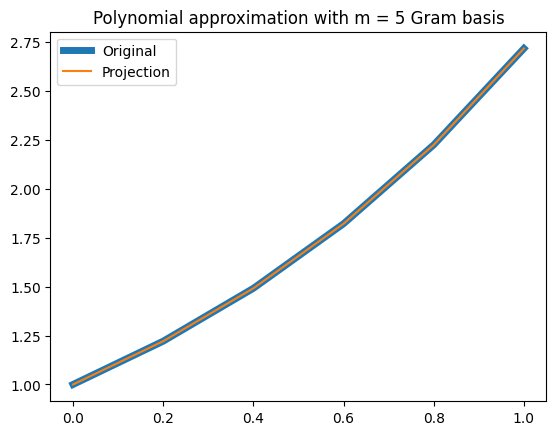

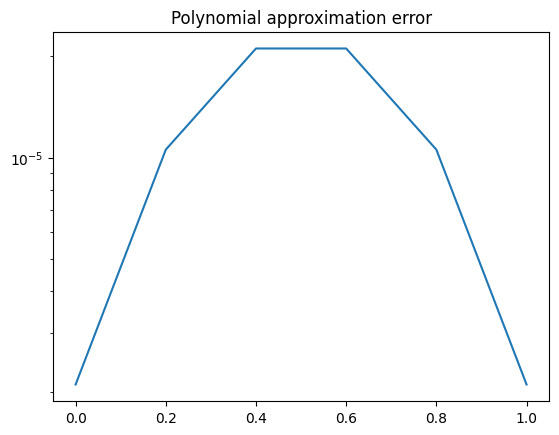

In [216]:
x = np.linspace(0, 1, 6) 
f = np.exp(x)
m = 5
gs = GramSchmidt(x, m=5)

coeffs = gs.projectFunction(f) 
frec   = gs.reconstructFunction(coeffs) 

plt.title(f"Polynomial approximation with m = {m} Gram basis")
plt.plot(x, f,    lw = 5,  label="Original")
plt.plot(x, frec,          label="Projection")
plt.legend()
plt.show()
plt.title(f"Polynomial approximation error")
plt.plot(x, np.abs(f - frec))
plt.yscale("log")
plt.show()

### Step 3: Compute FC(SVD) continuations for even and odd pairs of Gram polynomials

In [220]:
import mpmath as mp

np.dps = 32

M_ALL_K  = 0 
M_EVEN_K = 1
M_ODD_K  = 2 


def t(g, mode = M_ALL_K):
    if g % 2 == 0:
        k = np.arange(-int(-g/2) + 1, int( g/2   ) + 1)
    else:
        k = np.arange(-int((g-1)/2) , int((g-1)/2) + 1)

    if mode == M_EVEN_K:
        k = k[k % 2 == 0]
    elif mode == M_ODD_K:
        k = k[k % 2 == 1]

    print(k)

    return k 
    
def getX(Delta, Gamma):
    dx = Delta / (Gamma - 1)
    return 1 - Delta + np.arange(Gamma) * dx 

def getM(g, Gamma, Delta, d, mode): 
    ks = t(g, mode)
    x  = getX(Delta, Gamma) 
    M  = np.zeros((Gamma, len(ks)), dtype=complex)
    for i in range(Gamma):
        for j, k in enumerate(ks):
            M[i, j] = np.exp(1j * k * np.pi / (d + Delta) * x[i])
    return M

def invertComplexM(M, cutoff):
    U, s, Vh = scipy.linalg.svd(M)
    sinv = np.zeros(M.T.shape, dtype=complex)
    for i in range(np.min(M.shape)):
        if s[i] < cutoff:
            sinv[i, i] = 0
        else:
            sinv[i, i] = 1/s[i]
    return Vh.T.conjugate() @ sinv @ U.T.conjugate()

def reconstruct(x, a, g, Gamma, Delta, d, mode): 
    ks = t(g, mode)
    rec = np.zeros(x.shape, dtype=complex) 
    for j, coeff in enumerate(a): 
        rec += coeff * np.exp(1j * ks[j] * np.pi / (d + Delta) * x)
    return rec


def iterativeRefinement(M, Minv, f, threshold = 100, maxiter = 100): 
    a       = Minv @ f
    r       = M @ a - f
    counter = 0
    while np.linalg.norm(r) > 2 * np.finfo(float).eps * np.linalg.norm(a) and counter < maxiter: 
        delta    = Minv @ r
        a        = a - delta 
        r        = M @ a - f
        counter += 1
    return a

def computeExtension(x, g, Gamma, Delta, d, mode, f, threshold = 10, maxiter = 10):
    M     = getM(g, Gamma, Delta, d, mode)
    Minv  = invertComplexM(M, 0) 
    a     = iterativeRefinement(M, Minv, f) 
    frec  = reconstruct(x, a, g, Gamma, Delta, d, mode)
    return frec


In [221]:

m      = 5
n      = 10 
nDelta = 10 
nd     = 27
Gamma  = 150
g      = 63
h      = 1/(nd - 1) 
d      = (nd - 1) * h 
Delta  = (nDelta  - 1) * h 

x = np.linspace(0, 1, nd)

leftBoundary  = x[       :nDelta]
rightBoundary = x[-nDelta:      ]

dxeval = Delta/(Gamma - 1) 
xeval  = 1 - Delta + np.arange(Gamma) * dxeval


lgs = GramSchmidt(leftBoundary, m)
rgs = GramSchmidt(rightBoundary, m)

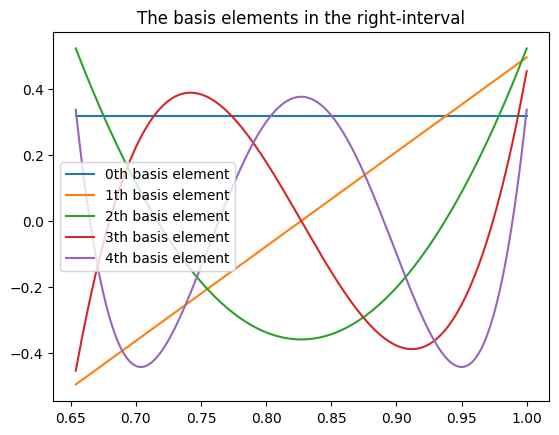

[-30 -28 -26 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4
   6   8  10  12  14  16  18  20  22  24  26  28  30]
[-30 -28 -26 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4
   6   8  10  12  14  16  18  20  22  24  26  28  30]


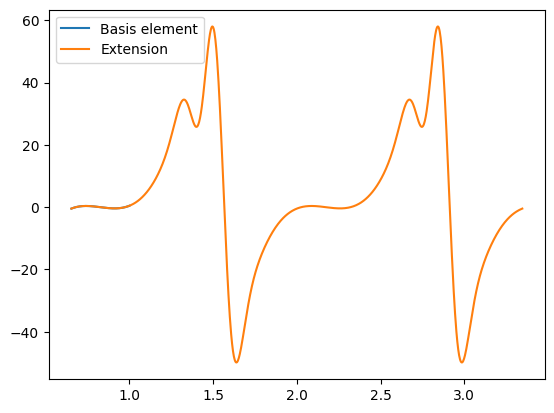

In [223]:

plt.title("The basis elements in the right-interval")
for i in range(m): 
    yeval = rgs.evaluateBasis(xeval, i)
    plt.plot(xeval, yeval, label=f"{i}th basis element") 
plt.legend()
plt.show()

i = 3
yeval = rgs.evaluateBasis(xeval, i)
xext  = np.linspace(1 - Delta, 1 + Delta + 2*d, 1000) 
yext  = computeExtension(xext, g, Gamma, Delta, d, M_EVEN_K, yeval)

plt.plot(xeval, yeval, label="Basis element")
plt.plot(xext, yext.real, label="Extension")
plt.legend()
plt.show()


In [226]:
x = [4.440892098500626e-16
,2.703393064962256e-13
,5.316858064929875e-13
,7.87592213669086e-13
,1.0399459071663841e-12
,1.2865264409356314e-12
,1.5296652833285407e-12
,1.770028568159887e-12
,2.007727317732133e-12
,2.242428465137891e-12
,2.4752422334017865e-12
,2.705280444104119e-12
,2.9344304763867513e-12
,3.160027794990583e-12
,3.382849556032852e-12
,3.6064484731923585e-12
,3.827826944302615e-12
,4.0460967909439205e-12
,4.263034369955676e-12
,4.479527859757582e-12
,4.692246591275762e-12
,4.9045212335840915e-12
,5.115241563657946e-12
,5.323408380775163e-12
,5.523914659022466e-12
,5.733302721466771e-12
,5.933475932806687e-12
,6.133760166449065e-12
,6.335487690023456e-12
,6.529998763937783e-12
,6.723288592525023e-12
,6.921574424723076e-12
,7.118639011594041e-12
,7.313261107810831e-12
,7.502665155811883e-12
,7.691514092300622e-12
,7.880807117999211e-12
,8.0709883221175e-12
,8.260614414723477e-12
,8.449463351212216e-12
,8.63631388625663e-12
,8.816947172363143e-12
,8.999800904518906e-12
,9.183320770489445e-12
,9.366840636459983e-12
,9.55424628301671e-12
,9.738654327406948e-12
,9.923284416402112e-12
,1.0103917702508625e-11
,1.0283218720985587e-11
,1.045985520420345e-11
,1.0630607505390799e-11
,1.0806355810188961e-11
,1.0983436382616674e-11
,1.1157408330575436e-11
,1.1337375482867174e-11
,1.1518896947393387e-11
,1.1700640456524525e-11
,1.1881495787235963e-11
,1.2061684984132626e-11
,1.2241874181029289e-11
,1.24162902181979e-11
,1.2589818076946813e-11
,1.2762124690368637e-11
,1.2934098236883074e-11
,1.3101852935903935e-11
,1.3263723452894283e-11
,1.3423928635347693e-11
,1.358357870628879e-11
,1.3746226379396376e-11
,1.3908096896386724e-11
,1.4070744569494309e-11
,1.4233503264904357e-11
,1.4395262759592242e-11
,1.4563128480915566e-11
,1.4732659536775827e-11
,1.490485512789519e-11
,1.5078938098156414e-11
,1.5248469154016675e-11
,1.5419776566716337e-11
,1.55919721578357e-11
,1.5764722860467373e-11
,1.593714049619166e-11
,1.610978017652087e-11
,1.628441825829441e-11
,1.6450063533568482e-11
,1.6613155295885917e-11
,1.6777246258925516e-11
,1.69398939320331e-11
,1.7098211735344648e-11
,1.7253309891884783e-11
,1.741251587361603e-11
,1.7568391186273402e-11
,1.7721712985974136e-11
,1.7873369451137933e-11
,1.8019252756573678e-11
,1.8166468329638974e-11
,1.8307688698371294e-11
,1.8447576799474064e-11
,1.8587908989786683e-11
,1.8725243577932815e-11
,1.8870904838763636e-11
,1.901800938952647e-11
,1.9159562825166176e-11
,1.930233750613297e-11
,1.9446000365519467e-11
,1.9589219135696112e-11
,1.9730439504428432e-11
,1.9878321211308503e-11
,2.0020873847670373e-11
,2.0159207636538667e-11
,2.0303980718949788e-11
,2.045097424741016e-11
,2.0599077998895154e-11
,2.075073446405895e-11
,2.090827511125326e-11
,2.1065926780750033e-11
,2.1223911517154193e-11
,2.1386892257169166e-11
,2.1551760376326e-11
,2.1721846543698575e-11
,2.1889601242719436e-11
,2.2059798432394473e-11
,2.2231216867396597e-11
,2.2397861343392833e-11
,2.256539399780877e-11
,2.2733481763737018e-11
,2.2898793972103704e-11
,2.306899116177874e-11
,2.324018755217594e-11
,2.34097186080362e-11
,2.3578139440871837e-11
,2.37503350319912e-11
,2.3927082537511524e-11
,2.410260879770476e-11
,2.4278579147107848e-11
,2.4456325853350336e-11
,2.4635848916432224e-11
,2.481448380109441e-11
,2.4990232105892574e-11
,2.517019925818431e-11
,2.5339952358649498e-11
,2.5508262169182672e-11
,2.5673352332944432e-11
,2.583744329598403e-11
,2.5999646879881766e-11
,2.6160185129242564e-11
,2.631928008867135e-11
,2.647648766895827e-11
,2.6631696847800868e-11
,2.6787239093550852e-11
,2.6944002584627924e-11
,2.709743540663112e-11
,2.7248647782585067e-11
,2.7396973578674988e-11
,2.7543411995623046e-11
,2.7687740988824316e-11
,2.7832736115840362e-11
,2.7979063510485958e-11
,2.8121616146847828e-11
,2.826994194293775e-11
,2.8418489783632594e-11
,2.856481717827819e-11
,2.870603754701051e-11
,2.8853253120075806e-11
,2.8997804157882e-11
,2.914080088345372e-11
,2.9281355118371266e-11
,2.941824561730755e-11
,2.955391487091674e-11
,2.968714163387176e-11
,2.9822810887480955e-11
,2.995770298497291e-11
,3.008959748029838e-11
,3.0219049484969673e-11
,3.035349749325178e-11
,3.048805652383635e-11
,3.062150533139629e-11
,3.075373289362915e-11
,3.088385103211522e-11
,3.101019441231756e-11
,3.1137536993242065e-11
,3.126698899791336e-11
,3.1392111132788614e-11
,3.152311744969438e-11
,3.164823958456964e-11
,3.1773028652537505e-11
,3.189237762768471e-11
,3.201727771795504e-11
,3.214428723197216e-11
,3.226652278698339e-11
,3.2393088211790655e-11
,3.2521541015739786e-11
,3.2649438708176604e-11
,3.278133320350207e-11
,3.2916003256389104e-11
,3.3055891357491873e-11
,3.319533536938479e-11
,3.333522347048756e-11
,3.347577770540511e-11
,3.36167760295325e-11
,3.375466572919095e-11
,3.3894442807991254e-11
,3.403899384579745e-11
,3.418332283899872e-11
,3.432409911852119e-11
,3.4468650156327385e-11
,3.4610758703479405e-11
,3.4759972677989026e-11
,3.490829847407895e-11
,3.5058733693915656e-11
,3.5205727222376026e-11
,3.535338688465117e-11
,3.550593152823467e-11
,3.5652703012090114e-11
,3.5797476094501235e-11
,3.594735620282563e-11
,3.6094127686681077e-11
,3.624045508132667e-11
,3.638611634215749e-11
,3.65383279188336e-11
,3.6692426874651574e-11
,3.6846081741259695e-11
,3.700062478628752e-11
,3.7155056809012876e-11
,3.730582509575697e-11
,3.745614929329122e-11
,3.7606473490825465e-11
,3.775857404519911e-11
,3.790734393049888e-11
,3.805555870428634e-11
,3.820166405432701e-11
,3.835087802883663e-11
,3.8499203824926553e-11
,3.8651526423905125e-11
,3.880784582577235e-11
,3.8960057402448456e-11
,3.911548862589598e-11
,3.92726962061829e-11
,3.942757231811811e-11
,3.959410577181188e-11
,3.9762304560042594e-11
,3.993205766050778e-11
,4.010236587248528e-11
,4.027900235570314e-11
,4.045541679431608e-11
,4.063072100990439e-11
,4.0810466117591204e-11
,4.099309780514204e-11
,4.1178616072556906e-11
,4.1366576830625945e-11
,4.1554981677904834e-11
,4.175282342089304e-11
,4.19534407214428e-11
,4.2153946999690106e-11
,4.235845008082606e-11
,4.2565284630313727e-11
,4.2775338826572806e-11
,4.2988057558090986e-11
,4.319966606658454e-11
,4.341327297652242e-11
,4.3625769663435676e-11
,4.3842485197842507e-11
,4.4052539394101586e-11
,4.4267922660878867e-11
,4.44873027305448e-11
,4.470623871100088e-11
,4.4929393538950535e-11
,4.515565699136914e-11
,4.53814763545779e-11
,4.560674060627434e-11
,4.5834558370927425e-11
,4.606726111688886e-11
,4.629852057291828e-11
,4.653122331887971e-11
,4.6762704819514056e-11
,4.7000514591388765e-11
,4.724043378701026e-11
,4.747990889342191e-11
,4.772549022646899e-11
,4.7974513250892414e-11
,4.822353627531584e-11
,4.847477974578851e-11
,4.872802161770551e-11
,4.898481620330131e-11
,4.9242498967316806e-11
,4.9500625820542155e-11
,4.9757975517650266e-11
,5.0017434638505165e-11
,5.027755989317484e-11
,5.0540349683103614e-11
,5.080025289316836e-11
,5.1060267125535574e-11
,5.1323278960069274e-11
,5.1586290794602974e-11
,5.18495246737416e-11
,5.211531206583686e-11
,5.2382986837073986e-11
,5.26509946752185e-11
,5.292066784789995e-11
,5.319156226590849e-11
,5.346212361700964e-11
,5.37314637227837e-11
,5.400380143072425e-11
,5.427647220557219e-11
,5.4547699690488116e-11
,5.481659570705233e-11
,5.508360434447468e-11
,5.5352167294131505e-11
,5.561973104306617e-11
,5.588696172509344e-11
,5.615785614310198e-11
,5.642841749420313e-11
,5.669886782300182e-11
,5.697209370936207e-11
,5.724698493025926e-11
,5.752365250799585e-11
,5.78004311080349e-11
,5.807798686419119e-11
,5.83522119512736e-11
,5.863054486354713e-11
,5.890987697654282e-11
,5.918832091111881e-11
,5.946776404641696e-11
,5.97502047838816e-11
,6.003220143213639e-11
,6.03161964818355e-11
,6.060330015600357e-11
,6.089639903450461e-11
,6.119216244826475e-11
,6.14888140404446e-11
,6.178957345781555e-11
,6.209377456656284e-11
,6.239964100984707e-11
,6.270539643082884e-11
,6.301570376621157e-11
,6.332789848073617e-11
,6.363931603914352e-11
,6.395206586518043e-11
,6.426537080272965e-11
,6.457923085179118e-11
,6.489642156992659e-11
,6.521372331036446e-11
,6.553113607310479e-11
,6.584943701426482e-11
,6.616884817844948e-11
,6.648492867356026e-11
,6.680178632478828e-11
,6.712075339976309e-11
,6.743816616250342e-11
,6.77569111928733e-11
,6.807299168798409e-11
,6.839051547302688e-11
,6.871059277102631e-11
,6.90275614445568e-11
,6.934586238571683e-11
,6.966816012976551e-11
,6.999001378460434e-11
,7.031231152865303e-11
,7.063416518349186e-11
,7.095779519517009e-11
,7.128153622915079e-11
,7.16058323746438e-11
,7.192879625250725e-11
,7.224887355050669e-11
,7.25705051607406e-11
,7.28912485925548e-11
,7.321310224739364e-11
,7.353584408065217e-11
,7.385791978009593e-11
,7.418177183637908e-11
,7.450406958042777e-11
,7.482792163671093e-11
,7.514955324694483e-11
,7.547151792408613e-11
,7.579337157892496e-11
,7.611766772441797e-11
,7.643974342386173e-11
,7.676070890028086e-11
,7.70825625551197e-11
,7.740530438837823e-11
,7.772338328493333e-11
,7.804368262753769e-11
,7.836242765790757e-11
,7.8681061665975e-11
,7.900047283015965e-11
,7.932010603894923e-11
,7.964040538155359e-11
,7.996137085797272e-11
,8.028033793294753e-11
,8.059786171799033e-11
,8.091749492677991e-11
,8.123623995714979e-11
,8.155454089830982e-11
,8.18715095718403e-11
,8.218858926767325e-11
,8.250400362896926e-11
,8.281764163342586e-11
,8.31323898609071e-11
,8.344613888766617e-11
,8.37582225798883e-11
,8.407141649513505e-11
,8.43822789420301e-11
,8.469214218820298e-11
,8.500389281351772e-11
,8.531353401508568e-11
,8.562450748428319e-11
,8.593536993117823e-11
,8.624456704353634e-11
,8.655520744582645e-11
,8.686307229055501e-11
,8.717304655903035e-11
,8.748357593901801e-11
,8.779033056072194e-11
,8.809875051696281e-11
,8.840395082643226e-11
,8.871281487188298e-11
,8.901845927056229e-11
,8.932221629009973e-11
,8.962508513121747e-11
,8.992429023635395e-11
,9.022027569471902e-11
,9.051581706387424e-11
,9.080869389777035e-11
,9.11009045978517e-11
,9.139178303030349e-11
,9.167622216921245e-11
,9.196043926351649e-11
,9.224332409019098e-11
,9.252487664923592e-11
,9.280698431979317e-11
,9.308498416515931e-11
,9.336142969829098e-11
,9.363576580767585e-11
,9.390754840410409e-11
,9.418010815664957e-11
,9.44501143962384e-11
,9.471867734589523e-11
,9.498468678259542e-11
,9.524903088475867e-11
,9.551159863008252e-11
,9.577272308547435e-11
,9.603329242935388e-11
,9.629363972862848e-11
,9.655110044803905e-11
,9.680767298902992e-11
,9.706357939620602e-11
,9.731970784798705e-11
,9.757561425516315e-11
,9.782818999326537e-11
,9.808076573136759e-11
,9.832934466658116e-11
,9.857770155718981e-11
,9.882583640319353e-11
,9.907197284775293e-11
,9.931855338152218e-11
,9.956147017931016e-11
,9.980249959795628e-11
,1.0004153061515808e-10
,1.0027800811940324e-10
,1.0051615095818534e-10
,1.0075329459624527e-10
,1.0098810676595349e-10
,1.0122191973493955e-10
,1.0145162487873449e-10
,1.0168077491101712e-10
,1.0190726040804066e-10
,1.0213496715039128e-10
,1.0235967629057541e-10
,1.0258016658326596e-10
,1.028013230097713e-10
,1.0301759445496828e-10
,1.032334218109554e-10
,1.0344702872089329e-10
,1.0365730496175729e-10
,1.038649166673622e-10
,1.0406975281540554e-10
,1.0426959295983806e-10
,1.0446710163591888e-10
,1.0466028044220366e-10
,1.0485068369092687e-10
,1.0503753422597129e-10
,1.0522016591352212e-10
,1.0539724648594984e-10
,1.05572994790748e-10
,1.0574563447107721e-10
,1.0591572063844978e-10
,1.0608525169431005e-10
,1.0625256230412106e-10
,1.064162091779508e-10
,1.0657752458342884e-10
,1.0673650852055516e-10
,1.0689105156558298e-10
,1.0703982145088276e-10
,1.0718625986783081e-10
,1.0732781330347052e-10
,1.0746126211103046e-10
,1.0759471091859041e-10
,1.0772249758872476e-10
,1.0784284576459413e-10
,1.0795442317856896e-10
,1.0806466832491424e-10
,1.0817069462376594e-10
,1.0827005958446989e-10
,1.0836753716603198e-10
,1.084604628331931e-10
,1.0854883658595327e-10
,1.0862966082214598e-10
,1.0870615518854265e-10
,1.087753220829768e-10
,1.0883771661696073e-10
,1.0889567025884617e-10
,1.0895040425396019e-10
,1.0899969815625354e-10
,1.0904577241177549e-10
,1.0908696168598908e-10
,1.0912415415731402e-10
,1.0915823800417002e-10
,1.0919187776181616e-10
,1.092201884489441e-10
,1.092415047310169e-10
,1.0925871318789859e-10
,1.0927581062247782e-10
,1.0928924432107578e-10
,1.0929590565922354e-10
,1.0930301108658114e-10
,1.0930634175565501e-10
,1.0930167881895159e-10
,1.0929546157001369e-10
,1.0928546956279206e-10
,1.092720358641941e-10
,1.0925382820659024e-10
,1.0923062454537558e-10
,1.0920542248271659e-10
,1.0917589055026156e-10
,1.0914180670340556e-10
,1.0910283787524122e-10
,1.0905842895425621e-10
,1.0900413904835204e-10
,1.0894529722804691e-10
,1.0888201451564328e-10
,1.0881162637588204e-10
,1.0874023903539864e-10
,1.0866640920426107e-10
,1.0858447474504374e-10
,1.0850054188438207e-10
,1.084116130201096e-10
,1.0831613383999183e-10
,1.0821721296849773e-10
,1.0811562756174453e-10
,1.0801493033341103e-10
,1.0790446314246083e-10
,1.0778689052415302e-10
,1.0766398883532702e-10
,1.0753653523210005e-10
,1.07400421889281e-10
,1.0725587085147481e-10
,1.0710576869854549e-10
,1.0694900520746842e-10
,1.0678724571278053e-10
,1.0662382088355571e-10
,1.0645850867518902e-10
,1.0628775637400167e-10
,1.0611489464906754e-10
,1.0593825816584967e-10
,1.0575895714737271e-10
,1.0557610341521695e-10
,1.0539658035213506e-10
,1.0521061799551035e-10
,1.0502354541586101e-10
,1.0483569568009443e-10
,1.0464595856518599e-10
,1.0445355691501845e-10
,1.0426270957708539e-10
,1.0407219530605971e-10
,1.0387757320984292e-10
,1.036795094222498e-10
,1.0348422119221823e-10
,1.0328893296218666e-10
,1.0308842668393936e-10
,1.028904739186487e-10
,1.0269618488933929e-10
,1.0249689985641908e-10
,1.0229239677528312e-10
,1.020827866682339e-10
,1.0187228838276496e-10
,1.0166412156564775e-10
,1.0145451145859852e-10
,1.0124578952996899e-10
,1.0103728964594438e-10
,1.0082390478061143e-10
,1.0061051991527847e-10
,1.0039702402764306e-10
,1.0018341711770518e-10
,9.99715865646067e-11
,9.975842374387867e-11
,9.954193025407676e-11
,9.93267690319044e-11
,9.911427234499115e-11
,9.890199770268282e-11
,9.868950101576957e-11
,9.847900273030064e-11
,9.827194613620804e-11
,9.806477851981299e-11
,9.786138566170166e-11
,9.766631947627502e-11
,9.74732516922927e-11
,9.72789626629833e-11
,9.709011372649456e-11
,9.690570568210433e-11
,9.671841105785006e-11
,9.653355892424997e-11
,9.63457091884834e-11
,9.616130114409316e-11
,9.59713419845798e-11
,9.577605375454823e-11
,9.558109859142405e-11
,9.538492218297279e-11
,9.518930088603383e-11
,9.499534492363182e-11
,9.479661500222392e-11
,9.459422134483475e-11
,9.43923827989579e-11
,9.419443003366723e-11
,9.399836464751843e-11
,9.380263232827701e-11
,9.360734409824545e-11
,9.34099464444671e-11
,9.320977323312718e-11
,9.300882286567003e-11
,9.280587409676855e-11
,9.259792932425626e-11
,9.238942944023165e-11
,9.218092955620705e-11
,9.196776673547902e-11
,9.175327164712144e-11
,9.154099700481311e-11
,9.132605782724568e-11
,9.110867615902407e-11
,9.088485519725964e-11
,9.066147832470506e-11
,9.04383234967554e-11
,9.021139391052202e-11
,8.998324307896155e-11
,8.975387100207399e-11
,8.952361074676674e-11
,8.929523787060134e-11
,8.906497761529408e-11
,8.883394020386959e-11
,8.860834288526576e-11
,8.83869644141555e-11
,8.816913865672404e-11
,8.794709405179901e-11
,8.772527149147891e-11
,8.75070016448376e-11
,8.729383882410957e-11
,8.708223031561602e-11
,8.687528474382589e-11
,8.666634077059143e-11
,8.645417715058556e-11
,8.624345682051171e-11
,8.603517898109203e-11
,8.583134203377085e-11
,8.562850428717184e-11
,8.543288299023288e-11
,8.523803884941117e-11
,8.504175141865744e-11
,8.483913571666335e-11
,8.464506873195887e-11
,8.445355526021103e-11
,8.425560249492037e-11
,8.405642848430261e-11
,8.385314664849375e-11
,8.364908765656764e-11
,8.344236412938244e-11
,8.322764699641994e-11
,8.300937714977863e-11
,8.27864443664339e-11
,8.256395567229902e-11
,8.234124493355921e-11
,8.211464841423322e-11
,8.189082745246878e-11
,8.16745560072718e-11
,8.14545098037911e-11
,8.123712813556949e-11
,8.101996851195281e-11
,8.08052513789903e-11
,8.059253264747213e-11
,8.038336662963275e-11
,8.017342345567613e-11
,7.99602606349481e-11
,7.974509941277574e-11
,7.953349090428219e-11
,7.932543510946743e-11
,7.911160615492463e-11
,7.889777720038182e-11
,7.868483642425872e-11
,7.846878702366666e-11
,7.824874082018596e-11
,7.802714030447078e-11
,7.781308930532305e-11
,7.759903830617532e-11
,7.738321095018819e-11
,7.715916794381883e-11
,7.693334858061007e-11
,7.670419854832744e-11
,7.648137678728517e-11
,7.625444720105179e-11
,7.602751761481841e-11
,7.580525096528845e-11
,7.55892015646964e-11
,7.536782309358614e-11
,7.51469997339882e-11
,7.493050624418629e-11
,7.471112617452036e-11
,7.449663108616278e-11
,7.427480852584267e-11
,7.405831503604077e-11
,7.384048927860931e-11
,7.362266352117786e-11
,7.3411943191104e-11
,7.31954497013021e-11
,7.297629167624109e-11
,7.276290681090813e-11
,7.255407385997614e-11
,7.235312349251899e-11
,7.215272823657415e-11
,7.195377627056132e-11
,7.176181870960363e-11
,7.157130443857795e-11
,7.138245550208921e-11
,7.119960176993345e-11
,7.102207710829589e-11
,7.084810516033713e-11
,7.06757985469153e-11
,7.049982819751222e-11
,7.032519011573868e-11
,7.016331959874833e-11
,7.000600099615895e-11
,6.985501066480992e-11
,6.970535260109045e-11
,6.956568654459261e-11
,6.943556840610654e-11
,6.930622742373771e-11
,6.918521311405357e-11
,6.907252547705411e-11
,6.896117010768421e-11
,6.886069492395563e-11
,6.87601087179246e-11
,6.865696899893692e-11
,6.855427336915909e-11
,6.844913524872709e-11
,6.834577348513449e-11
,6.823863696325816e-11
,6.812395092481438e-11
,6.801148533241985e-11
,6.790212836449427e-11
,6.77901068613096e-11
,6.767231219839687e-11
,6.75528522009472e-11
,6.742750802146702e-11
,6.73040512211287e-11
,6.717559841717957e-11
,6.704592436790335e-11
,6.691480702869512e-11
,6.67886856930977e-11
,6.665767937619194e-11
,6.65238975017246e-11
,6.639000460495481e-11
,6.62653265592894e-11
,6.614497838342004e-11
,6.602385305143343e-11
,6.59033938532616e-11
,6.578237954357746e-11
,6.566280852382533e-11
,6.55441256824929e-11
,6.542666408648756e-11
,6.530576079910588e-11
,6.518463546711928e-11
,6.506406524664499e-11
,6.493938720097958e-11
,6.480815883946889e-11
,6.467637536644588e-11
,6.454803358479921e-11
,6.442180122689933e-11
,6.430145305102997e-11
,6.417677500536456e-11
,6.405176389279177e-11
,6.393019447159531e-11
,6.380884709500378e-11
,6.368561233927039e-11
,6.355937998137051e-11
,6.34314822889337e-11
,6.330347357419441e-11
,6.317935064004132e-11
,6.304501365406168e-11
,6.29134522256436e-11
,6.278511044399693e-11
,6.264699869973356e-11
,6.251077433461205e-11
,6.237488303639793e-11
,6.224876170080051e-11
,6.212541592276466e-11
,6.200451263538298e-11
,6.187972356741511e-11
,6.175748801240388e-11
,6.163447530127542e-11
,6.151490428152329e-11
,6.139488917256131e-11
,6.127254259524761e-11
,6.114719841576743e-11
,6.102174321398479e-11
,6.089551085608491e-11
,6.076716907443824e-11
,6.063805013667434e-11
,6.050948631042274e-11
,6.038858302304106e-11
,6.02655703119126e-11
,6.014244657848167e-11
,6.001599217597686e-11
,5.989719831234197e-11
,5.978340045231789e-11
,5.966493965559039e-11
,5.954936543872691e-11
,5.943934233698656e-11
,5.933087354748068e-11
,5.922018431192555e-11
,5.911260370083937e-11
,5.900546717896304e-11
,5.890743448588864e-11
,5.881051201583887e-11
,5.871569896953588e-11
,5.862210716855998e-11
,5.85269610553496e-11
,5.843037165220721e-11
,5.832612171019491e-11
,5.821254589477576e-11
,5.809575043258519e-11
,5.797662350204291e-11
,5.785660839308093e-11
,5.7733595681952465e-11
,5.760047994129991e-11
,5.746370046466609e-11
,5.7323146229748545e-11
,5.7181481771806375e-11
,5.704581251819718e-11
,5.6904370104859936e-11
,5.6764815070664554e-11
,5.6630700129289835e-11
,5.6501470169223467e-11
,5.636613398252166e-11
,5.6233129264171566e-11
,5.61056756609446e-11
,5.5980997615279193e-11
,5.58515456106079e-11
,5.572620143112772e-11
,5.560141236315985e-11
,5.547828862972892e-11
,5.536071601142112e-11
,5.5247584285211815e-11
,5.513955958491579e-11
,5.5040194624211836e-11
,5.495126575993936e-11
,5.486222587336442e-11
,5.477596154435105e-11
,5.469713570960266e-11
,5.46238609899774e-11
,5.455702556389497e-11
,5.449007911551007e-11
,5.442857275994584e-11
,5.4368842761221003e-11
,5.431566307834146e-11
,5.42610401055299e-11
,5.420763837804543e-11
,5.415390358365357e-11
,5.41005018561691e-11
,5.406286529563431e-11
,5.402944758259309e-11
,5.39989164494159e-11
,5.396527669176976e-11
,5.393852031687629e-11
,5.3913429276519764e-11
,5.388645085702137e-11
,5.386324719580671e-11
,5.3847704073461955e-11
,5.3835380597888616e-11
,5.3831383794999965e-11
,5.3820281564753714e-11
,5.381295409279119e-11
,5.380917933450746e-11
,5.381028955753209e-11
,5.381606271726014e-11
,5.381384227121089e-11
,5.3818061118704463e-11
,5.382405632303744e-11
,5.382361223382759e-11
,5.3819837475543864e-11
,5.381406431581581e-11
,5.381317613739611e-11
,5.380740297766806e-11
,5.3801851862544936e-11
,5.3788640208551897e-11
,5.3777093889095795e-11
,5.3768212104898794e-11
,5.376366019049783e-11
,5.3761661789053505e-11
,5.376055156602888e-11
,5.3761661789053505e-11
,5.377331913081207e-11
,5.378264500421892e-11
,5.378797407473712e-11
,5.379108269920607e-11
,5.379596768051442e-11
,5.3800186528008e-11
,5.380251799635971e-11
,5.380207390714986e-11
,5.379952039419322e-11
,5.379285905604547e-11
,5.377909229054012e-11
,5.375699885235008e-11
,5.373457234725265e-11
,5.371381117669216e-11
,5.3694049206853833e-11
,5.366951327800962e-11
,5.3643200992326e-11
,5.360867305626016e-11
,5.357347898637954e-11
,5.352696064164775e-11
,5.347955411849625e-11
,5.3427151591733946e-11
,5.33766364441135e-11
,5.332045915906747e-11
,5.32635047179042e-11
,5.319955587168579e-11
,5.313249840099843e-11
,5.307032591161942e-11
,5.30111510244069e-11
,5.294675808897864e-11
,5.2879922662896206e-11
,5.2812421102998997e-11
,5.275069270282984e-11
,5.268951941417299e-11
,5.262867919242353e-11
,5.2562509900155874e-11
,5.250444523596798e-11
,5.2448267950921945e-11
,5.239209066587591e-11
,5.233202760024369e-11
,5.2276960538222284e-11
,5.222333676613289e-11
,5.217004606095088e-11
,5.2113313664392535e-11
,5.206091113763023e-11
,5.200506691949158e-11
,5.19502219020751e-11
,5.1888160434998554e-11
,5.1817550250632394e-11
,5.174760620008101e-11
,5.167255512361635e-11
,5.159817018096646e-11
,5.151901127931069e-11
,5.14384090877229e-11
,5.1360027342184367e-11
,5.127853697217688e-11
,5.1191828553953656e-11
,5.110278866737872e-11
,5.101274958008162e-11
,5.0928816719419956e-11
,5.084999088467157e-11
,5.076694620242961e-11
,5.067557484750296e-11
,5.058042873429258e-11
,5.048628182180437e-11
,5.038736095031027e-11
,5.028244487448319e-11
,5.016775883603941e-11
,5.005440506522518e-11
,4.9938386759151854e-11
,4.9817150404862787e-11
,4.9691806225382606e-11]


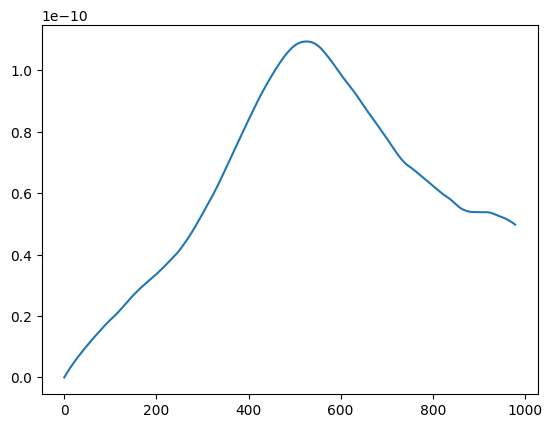

In [227]:
plt.plot(x)